# Supervisor and simulation test notebook for the MICRO-502 course project

## Finding a shortest path on the grid

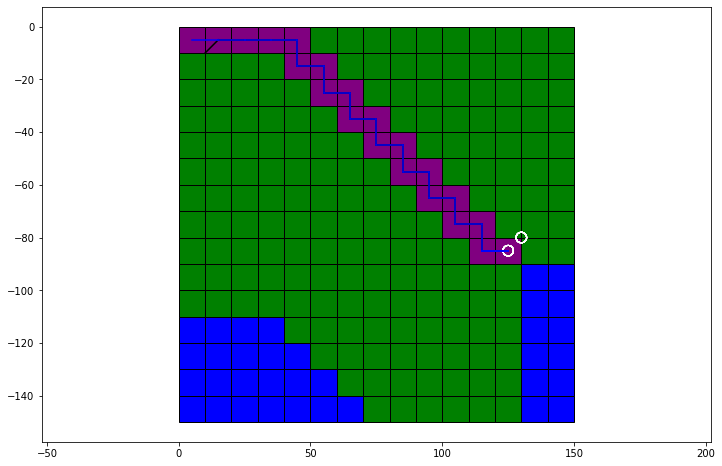

In [8]:
from global_nav import GlobalNav
from global_display import GlobalDisplay as disp
from global_simulator import Simulator
import random

# randomly generating a grid with blocked areas
glonav = GlobalNav(150,150,15,15,10,10,True)

sim = Simulator(glonav,0,0,0)

goal_x = 130
goal_y = 80

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)
    

    
#simulate steps
for i in range(40):
    step()

disp.showGrid(glonav)

# displaying the graph object that we run Dijkstra on
# disp.showNavGraph(glonav)
# displaying the graph object that represents space
# disp.showGraph(glonav)

## Finding a shortest path through a blocked map

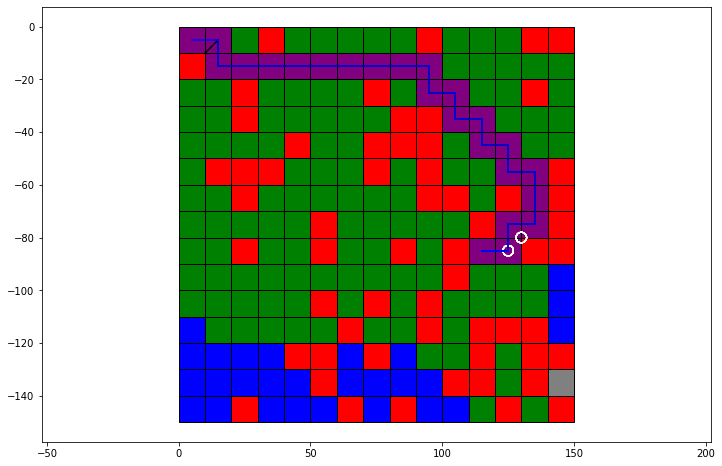

In [9]:
from global_nav import GlobalNav
from global_display import GlobalDisplay as disp
from global_simulator import Simulator
import random

# randomly generating a grid with blocked areas
glonav = GlobalNav(150,150,15,15,10,10,True)

sim = Simulator(glonav,0,0,0)

goal_x = 130
goal_y = 80

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)

# blocking some cells
random.seed(2)
for i in range(70):
    c = random.randint(0,glonav.cols-1)
    r = random.randint(0,glonav.rows-1)
    if(c != 0 or r != 0):
        glonav.block(c, r)
    

    
#simulate steps
for i in range(40):
    step()

disp.showGrid(glonav)

# displaying the graph object that we run Dijkstra on
# disp.showNavGraph(glonav)
# displaying the graph object that represents space
# disp.showGraph(glonav)

## Finding a shortest path mapping obstacles as we advance

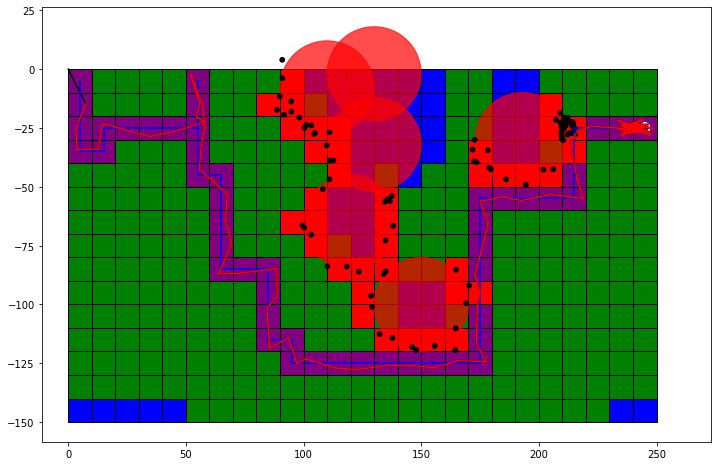

Collision number : 0


In [3]:
from global_nav import GlobalNav
from global_display import GlobalDisplay as disp
from global_simulator import Simulator
import random

# randomly generating a grid with blocked areas
glonav = GlobalNav(250,150,25,15,0,0)

sim = Simulator(glonav,2,2)

goal_x = 260
goal_y = 30

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)

# blocking some cells
random.seed(1)
    

# add a bunch of test obstacles
sim.add_obstacle(130,32,20)
sim.add_obstacle(130,2,20)
sim.add_obstacle(110,8,20)
sim.add_obstacle(120,65,20)
sim.add_obstacle(193,30,20)
sim.add_obstacle(150,100,20)
    
#simulate steps
for i in range(80):
    step()

disp.showGrid(glonav,sim)
#disp.showNavGraph(glonav)

# displaying the graph object that we run Dijkstra on
#disp.showNavGraph(glonav)
# displaying the graph object that represents space
#disp.showGraph(glonav)
print("Collision number : " + str(len(sim.collisions)))

## Modelling gaussian error integration (navigating without a global reference)

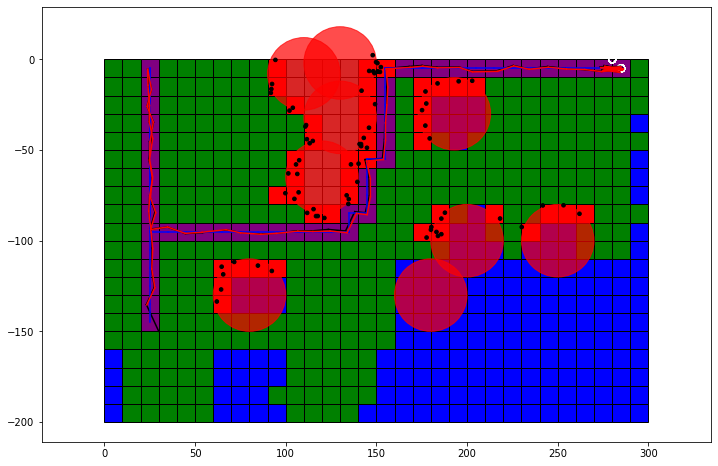

Collision number : 0


In [2]:
from global_nav import GlobalNav
from global_display import GlobalDisplay as disp
from global_simulator import Simulator
import random

# randomly generating a grid with blocked areas
glonav = GlobalNav(300,200,30,20,30,150,False)

sim = Simulator(glonav,1,2,0.2)

goal_x = 280
goal_y = 0

# defines a simulation step
def step():
    sim.sense()
    sim.check_collisions()
    [wx,wy] = glonav.navTo(goal_x,goal_y)
    nx, ny = sim.waypoint_line(wx,wy)
    glonav.update(nx,ny)

# blocking some cells

    

# add a bunch of test obstacles
sim.add_obstacle(130,32,20)
sim.add_obstacle(130,2,20)
sim.add_obstacle(110,8,20)
sim.add_obstacle(120,65,20)
sim.add_obstacle(193,30,20)
sim.add_obstacle(250,100,20)
sim.add_obstacle(80,130,20)
sim.add_obstacle(200,100,20)
sim.add_obstacle(180,130,20)
    
#simulate steps
for seed in range(1):
    random.seed(seed)
    for i in range(70):
        step()
    disp.showGrid(glonav,sim)

    print("Collision number : " + str(len(sim.collisions)))
    if len(sim.collisions)>0:
        print("This is why we need a local avoidance loop lol")

